# Exercise 05:  Image Processing - Kernel Filter + Student Exercise
**Objectives of the lesson:**

1. Preprocessing Image
2. OpenCV Image Filter
3. 5x5 Image Filter
4. 3x3 Image Filter - Student Exercise
5. Histogram computation - Student Exercise

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## 1. Preprocessing Image
**Description:** <br>
To simplify the image processing, the image is converted to a 2D array (three channels are included in default image).

Original image shape:  (320, 320, 3)
Grey-scaled image:


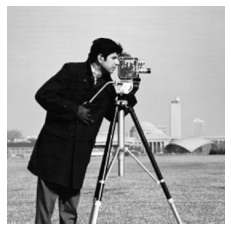

Grey image shape:  (320, 320)


In [9]:
# read image
img = plt.imread('cameraman.jpg')
# print original image shape
print("Original image shape: ", img.shape)
# convert three-dimensional image channels to single grey channel
grey_img_2d = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# normalize image values between 0 and 1
grey_img = grey_img_2d / 255
# clipping image values
np.clip(grey_img, 0, 1, out=grey_img)
# plot grey-scaled image
print("Grey-scaled image:")
plt.imshow(grey_img, cmap='Greys_r', vmin=0, vmax=1)
plt.axis("off")
plt.show()
# print shape of grey-scaled image
print("Grey image shape: ", grey_img.shape)

## 2. OpenCV Image Filter 

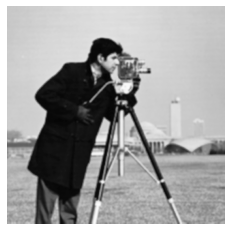

In [3]:
# blur filter kernel
mask = np.array([[1/9, 1/9, 1/9],
                 [1/9, 1/9, 1/9],
                 [1/9, 1/9, 1/9]])
# -1 == depth parameter, output image will have the same depth as the input image
result_cv = cv2.filter2D(grey_img, -1, mask)
# plot blurred image
plt.imshow(result_cv, cmap='Greys_r', vmin=0, vmax=1)
plt.axis("off")
plt.show()

## 3. 5x5 Image Filter
**Description:** <br>
Applying 5x5 filter to image, input image == img and filt == is selected kernel (neutral or Gaussian blur). In this example, the cut method is used to treat the edges of the image. The pixels at the edge, where the filter mask extends beyond the image, are omitted.

In [118]:
def filterImg55(img, filt):
    # no pixel border calulation == 0
    mask = np.zeros((5,5))
    # choose mask to filter
    if filt == 1:
        # neutral
        mask = np.array([[0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0]])
    if filt == 2:
        # 5x5 Gaussian blur filter - https://www.codingame.com/playgrounds/2524/basic-image-manipulation/filtering
        mask = np.array([[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                       [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                       [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                       [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                       [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]])
    
        
    
    # apply filter mask
    filteredImg = np.zeros((len(img),len(img[0])))
    # iterate through rows of 2D-image
    for i in range(len(img)):
        # iterate through columns of 2D-image
        for j in range(len(img[i])):
            if i>1 and i < len(img)-2 and j>1 and j<len(img[i])-2:
                filteredImg[i,j] = img[i-2, j-2]*mask[0,0] + img[i-2, j-1]*mask[0,1] + img[i-2,j]*mask[0,2] + img[i-2,j+1]*mask[0,3] + img[i-2,j+2]*mask[0,4] \
                                + img[i-1, j-2]*mask[1,0] + img[i-1, j-1]*mask[1,1] + img[i-1,j]*mask[1,2] + img[i-1,j+1]*mask[1,3] + img[i-1,j+2]*mask[1,4] \
                                + img[i, j-2]*mask[2,0] + img[i, j-1]*mask[2,1] + img[i,j]*mask[2,2] + img[i,j+1]*mask[2,3] + img[i,j+2]*mask[2,4] \
                                + img[i+1, j-2]*mask[3,0] + img[i+1, j-1]*mask[3,1] + img[i+1,j]*mask[3,2] + img[i+1,j+1]*mask[3,3] + img[i+1,j+2]*mask[3,4] \
                                + img[i+2, j-2]*mask[4,0] + img[i+2, j-1]*mask[4,1] + img[i+2,j]*mask[4,2] + img[i+2,j+1]*mask[4,3] + img[i+2,j+2]*mask[4,4]
    
    # clipping image values
    np.clip(filteredImg, 0, 1, out=filteredImg)
    print("Filtered")
    plt.imshow(filteredImg, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis("off")
    plt.show()
    return filteredImg

Filtered


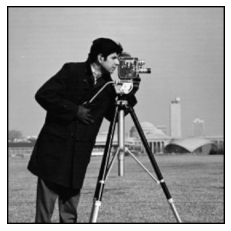

Filtered


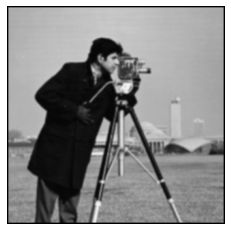

In [117]:
# execute neutral 5x5-Kernel
img_55 = filterImg55(grey_img, 1)
# execute Gaussian blur 5x5-Kernel
img_blur_55 = filterImg55(grey_img, 2)

## 4. 3x3 Image Filter - Student Exercise

**Description:** Applying 3x3 filter to image, input image == img and filt == is selected kernel (neutral, blur, sharpen, vertical edges and horizontal edges). In this example, the cut method is used to treat the edges of the image. The pixels at the edge, where the filter mask extends beyond the image, are omitted. <br>

**Exercise:**<br>
Complete the function to apply kernel filters to images. 

In [4]:
def filterImg33(img, filt):
    # choose mask to filter
    mask = np.zeros((3,3))
    # neutral
    if filt == 1:
        mask = np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]])
    # blur
    if filt == 2:
        mask = np.array([[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]])
    # sharpen
    if filt == 3:
        mask = np.array([[-1/9, -1/9, -1/9],[-1/9, 2-1/9, -1/9],[-1/9, -1/9, -1/9]])
    # vertical edges
    if filt == 4:
        mask = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
    # horizontal edges
    if filt == 5:
        mask = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    
        
    ################ Student Exercise Start ################ 
    # apply filter mask
    #filteredImg = #Todo Student
    filteredImg = np.zeros((len(img),len(img[0])))
    # iterate through rows of 2D-image
    for i in range(len(img)):
        # iterate through columns of 2D-image
        for j in range(len(img[i])):
            if i>0 and i < len(img)-1 and j>0 and j<len(img[i])-1:
                filteredImg[i,j] = img[i-1, j-1]*mask[0,0] + img[i-1,j]*mask[0,1] + img[i-1,j+1]*mask[0,2] + img[i,j-1]*mask[1,0] + img[i,j]*mask[1,1] + img[i,j+1]*mask[1,2] + img[i+1,j-1]*mask[2,0] + img[i+1,j]*mask[2,1] + img[i+1,j+1]*mask[2,2]
            
    ################ Student Exercise End ################
    
    # normalize filter values
    if filt == 4 or filt == 5:
        img_min = np.min(filteredImg)
        filteredImg[:,:] = filteredImg[:,:]-img_min
        img_max = np.max(filteredImg)
        filteredImg[:,:] = filteredImg[:,:]/img_max
    
    # clipping image values
    np.clip(filteredImg, 0, 1, out=filteredImg)
    print("Filtered Image: ")
    plt.imshow(filteredImg, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis("off")
    plt.show()
    return filteredImg

Filtered Image: 


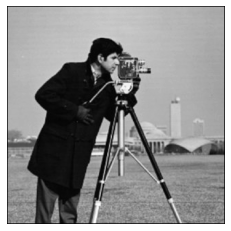

In [115]:
img_sharp = filterImg33(grey_img, 1)

## 5. Histogram Computation - Student Exercise

**Description:**<br>
Compute histogram of a greyscaled 2D-image.

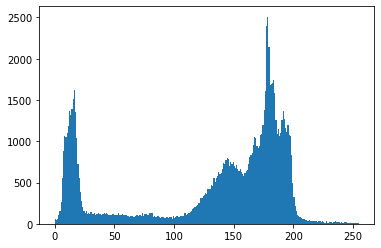

In [107]:
plt.hist(grey_img_2d.ravel(), bins = 255)
plt.show()

**Exercise:**<br>
Compute the manual histogram of a given 2D-image (greyscaled: values between: 0 - 255).

In [122]:
def computeHistogram(img):
    ################ Student Exercise Start ################ 
    # 1-D array for pixel values
    pixel_count = np.zeros(shape=(256), dtype=int) #Todo Student

    # Durch die Zeilen des Bildes iterieren
    for i in range(len(img)):
        # iterate through columns of 2D-image
            for j in range(len(img[i])):
                # add histogram value to existing values
                pixel_count[img[i,j]] = pixel_count[img[i,j]] + 1 
    
    ################ Student Exercise End ################ 
    
    # return histogram value
    return pixel_count

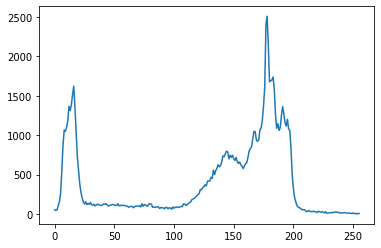

In [123]:
# given plot to chekc results of histogram exercise
plt.plot(range(256), computeHistogram(grey_img_2d))
plt.show()